# Setores Censitários

## Fontes

ftp://geoftp.ibge.gov.br/recortes_para_fins_estatisticos/malha_de_setores_censitarios/censo_2010/base_de_faces_de_logradouros_versao_2019/PR/

https://cidades.ibge.gov.br/brasil/panorama

In [1]:
%matplotlib inline
import pandas as pd
import geopandas as gpd

In [2]:
import os
import zipfile
import shutil

In [3]:
#os.chdir("../data/")

In [4]:
dir = '../data/raw/mapas/cascavel/temp'
if not os.path.exists(dir):
    os.makedirs(dir)

In [5]:
filenames = []
for root, dirs, files in os.walk('../data/raw/mapas/cascavel'):
    #print(files)
    filenames.append(files)
    
filenames

[['41048080500.zip',
  '41048081500.zip',
  '41048082500.zip',
  '41048083500.zip',
  '41048084000.zip',
  '41048084500.zip',
  '41048085000.zip',
  '41048085500.zip'],
 []]

In [6]:
for item in filenames[0]:
    zip_ref = zipfile.ZipFile('../data/raw/mapas/cascavel/' + item, 'r')
    zip_ref.extractall(dir)
    zip_ref.close()

In [7]:
filenames[0]

['41048080500.zip',
 '41048081500.zip',
 '41048082500.zip',
 '41048083500.zip',
 '41048084000.zip',
 '41048084500.zip',
 '41048085000.zip',
 '41048085500.zip']

In [8]:
filenames[0][0][:-4]

'41048080500'

In [9]:
[gpd.read_file(dir + '/' + item[:-4] + '_setor.shp') for item in filenames[0]]

[        ID1       CD_GEOCODI    TIPO    CD_GEOCODB    NM_BAIRRO CD_GEOCODD  \
 0    201006  410480805000110  URBANO  410480805022  BRASMADEIRA  410480805   
 1    201007  410480805000111  URBANO  410480805022  BRASMADEIRA  410480805   
 2    201008  410480805000112  URBANO  410480805022  BRASMADEIRA  410480805   
 3    201009  410480805000113  URBANO  410480805023   INTERLAGOS  410480805   
 4    201010  410480805000114  URBANO  410480805023   INTERLAGOS  410480805   
 ..      ...              ...     ...           ...          ...        ...   
 423  202443  410480805000355  URBANO  410480805027      MORUMBI  410480805   
 424  202444  410480805000356  URBANO  410480805027      MORUMBI  410480805   
 425  202445  410480805000357  URBANO  410480805028    CATARATAS  410480805   
 426  202446  410480805000358  URBANO  410480805028    CATARATAS  410480805   
 427  202447  410480805000359  URBANO  410480805028    CATARATAS  410480805   
 
     NM_DISTRIT CD_GEOCODS NM_SUBDIST CD_GEOCODM N

In [10]:
setor = pd.concat([gpd.read_file(dir + '/' + item[:-4] + '_setor.shp') for item in filenames[0]], ignore_index=True)

In [11]:
shutil.rmtree(dir)

In [12]:
setor.head()

ID1       CD_GEOCODI    TIPO    CD_GEOCODB    NM_BAIRRO CD_GEOCODD  \
0  201006  410480805000110  URBANO  410480805022  BRASMADEIRA  410480805   
1  201007  410480805000111  URBANO  410480805022  BRASMADEIRA  410480805   
2  201008  410480805000112  URBANO  410480805022  BRASMADEIRA  410480805   
3  201009  410480805000113  URBANO  410480805023   INTERLAGOS  410480805   
4  201010  410480805000114  URBANO  410480805023   INTERLAGOS  410480805   

  NM_DISTRIT CD_GEOCODS NM_SUBDIST CD_GEOCODM NM_MUNICIP           NM_MESO  \
0   CASCAVEL  410480805   CASCAVEL    4104808   CASCAVEL  OESTE PARANAENSE   
1   CASCAVEL  410480805   CASCAVEL    4104808   CASCAVEL  OESTE PARANAENSE   
2   CASCAVEL  410480805   CASCAVEL    4104808   CASCAVEL  OESTE PARANAENSE   
3   CASCAVEL  410480805   CASCAVEL    4104808   CASCAVEL  OESTE PARANAENSE   
4   CASCAVEL  410480805   CASCAVEL    4104808   CASCAVEL  OESTE PARANAENSE   

   NM_MICRO                                           geometry  
0  CASCAVEL  POLYGON ((-53.44218 -24.92686, -53.44199 -24.9...  
1  CASCAVEL  POLYGON ((-53.44640 -24.92081, -53.44644 -24.9...  
2  CASCAVEL  POLYGON ((-53.43904 -24.92160, -53.43890 -24.9...  
3  CASCAVEL  POLYGON ((-53.43539 -24.92253, -53.43479 -24.9...  
4  CASCAVEL  POLYGON ((-53.43408 -24.92145, -53.43418 -24.9...

In [13]:
type(setor)

geopandas.geodataframe.GeoDataFrame

In [14]:
setor.crs

<Geographic 2D CRS: EPSG:4674>
Name: SIRGAS 2000
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: Latin America - Central America and South America - onshore and offshore. Brazil - onshore and offshore.
- bounds: (-122.19, -59.87, -25.28, 32.72)
Datum: Sistema de Referencia Geocentrico para las AmericaS 2000
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [15]:
setor = setor.to_crs('+proj=utm +zone=22 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=km +no_defs')

In [16]:
setor.crs

<Bound CRS: +proj=utm +zone=22 +south +ellps=GRS80 +towgs84=0, ...>
Name: unknown
Axis Info [cartesian]:
- E[east]: Easting (kilometre)
- N[north]: Northing (kilometre)
Area of Use:
- undefined
Coordinate Operation:
- name: Transformation from unknown to WGS84
- method: Position Vector transformation (geog2D domain)
Datum: Unknown based on GRS80 ellipsoid
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich
Source CRS: unknown

<AxesSubplot:>

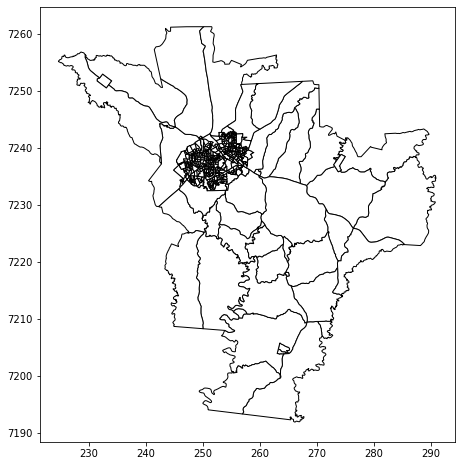

In [17]:
setor.plot(color='white', edgecolor='black', figsize=(15, 8))

In [18]:
#salvar mapa do municipio
setor.to_file('../data/processed/CASCAVEL-SETOR.shp')

In [19]:
coqueiral = setor[setor['NM_BAIRRO'] == 'COQUEIRAL']

<AxesSubplot:>

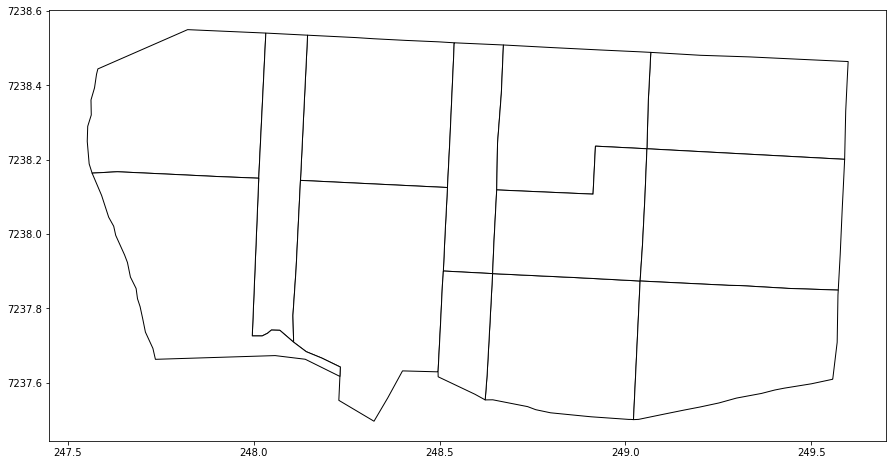

In [20]:
coqueiral.plot(color='white', edgecolor='black', figsize=(15, 8))

In [21]:
setor = setor[setor['TIPO'] == 'URBANO']

In [22]:
setor['NM_DISTRIT'].unique()

array(['CASCAVEL', "SÃO JOÃO D'OESTE", 'JUVINÓPOLIS', 'RIO DO SALTO',
       'SEDE ALVORADA', 'ESPIGÃO AZUL'], dtype=object)

In [23]:
setor = setor[setor['NM_DISTRIT'] == 'CASCAVEL']

<AxesSubplot:>

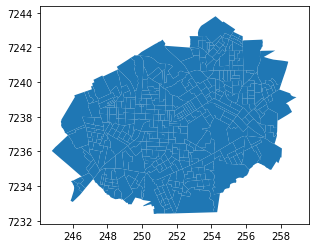

In [24]:
setor.plot()

In [25]:
#salvar perímetro urbano
setor.to_file('../data/processed/CASCAVEL-SETOR.shp')

In [26]:
setor.columns

Index(['ID1', 'CD_GEOCODI', 'TIPO', 'CD_GEOCODB', 'NM_BAIRRO', 'CD_GEOCODD',
       'NM_DISTRIT', 'CD_GEOCODS', 'NM_SUBDIST', 'CD_GEOCODM', 'NM_MUNICIP',
       'NM_MESO', 'NM_MICRO', 'geometry'],
      dtype='object')

In [27]:
setor.shape

(427, 14)